# Modelagem e Simulação - parte 2

```
(*) Adaptado de material preparado pelo Prof. Ronaldo Prati 
```

A natureza está repleta de seres vivos que convivem numa relação de **presa** e **predador**:
* Predadores (tubarões e raias) - Presas (diversos peixes)
* Predadores (linces e raposas) - Presas (lebres)

Considere o problema de estudar o equilíbrio populacional entre `presas` e `predadores` num determinado ambiente.

Este estudo pode ser feito por meio de modelos(que presentem adequadamente as propriedades e as relações) e da simulação computacional desses modelos.

Em modelagem e simulação é importante destacar que:
* um **modelo** é uma **representação parcial** de um objeto, sistema ou idéia;
* o ponto chave do processo de modelagem é descobrir as variáveis principais do objeto de estudo e a relação entre elas;
* modelos matemáticos (sistemas e equações) são usados para representar as principais características e comportamentos do sistema alvo que se deseja analisar (simular).

A seguir vamos estudar um problema de equilíbrio de populações por meio da equação de `Lotka-Volterra`.



## Equilibrio de populações - Equação de Lotka-Volterra

As equações de [Lotka-Volterra](https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_de_Lotka-Volterra) são frequentemente utilizadas para descrever dinâmicas nos **sistemas biológicos**, especialmente quando **duas espécies interagem em competição, cooperação ou outros tipos de interação**. 

Neste caderno vamos analisar o problema de equilibrio de populações em que uma espécie é **predadora**, e a outra é a **presa**. 



No modelo presa-predador há um conjunto de informações que são importantes e precisam ser considerados:
* densidade (número de especies) da presa (por exemplo, lebres)
* densidade (número de especies) do predador (por exemplo, raposas)
* taxa de natalidade da presa
* taxa de mortalidade do predador (especialmente se não tiver alimento)
* taxa de predação (que ocorre quando o predador encontra a presa)

O modelo predador-presa pode ser sumarizado pelas seguintes [equações diferenciais](https://pt.wikipedia.org/wiki/Equa%C3%A7%C3%A3o_diferencial) ordinárias (ODE), que descrevem a variação da população da presa de predador em relação à variação do tempo:
$$ \frac{dx}{dt} = b  x - h x y \\ \frac{dy}{dt} = \epsilon h x y - d y $$



Esse modelo tem duas variáveis:

- $x$ é a densidade da presa (por exemplo, uma lebre)
- $y$ é a densidade do predador (por exemplo, uma raposa)

E  quatro constantes que descrevem o comportamento da população:

- $b$ é a taxa de natalidade da presa 
- $d$ é a taxa de mortalidade do predador
- $h$ é a taxa em que, quando o predador encontra a presa, a predação ocorre
- $\epsilon$ é a taxa em que a densidade da presa é convertida em predator quando a predação ocorre.

É importa lembrar que um modelo é uma representação parcial. Assim, o modelo acima não considera, por exemplo, fatores externos, como o clima, que pode afetar o resultado da predação. Entretanto, ele auxilia no entendimento de modelos mais complexos. 

Esse modelo nos ajuda a analisar o equilibrio entre as duas espécies. 

-  Se os predadores forem extintos, a população da presa cresce a uma taxa proporcional a população atual;

- Se as presas forem extintas, a população de predadores deve se extinguir também, a uma taxa proporcional a sua população atual. Isso, porque o modelo considera que as presas são o único alimento dos predadores; 

- A coexistência de ambas espécies depende portanto do equilíbrio entre essas duas espécies. 
  - No modelo, a cada iteração, a população de presa cresce com a reprodução ($bx$), mas diminui com a predação ($-hxy$).
  - Já a população de predadores depende do impacto da captura de presas no aumento da população ($\epsilon h x y$) e a diminuição da população com a morte dos predadores. 

Vamos implementar um modelo que simula o equilíbrio entre essas duas espécies ao longo de várias iterações. 



## Simulação - Equações diferenciais

Podemos, de maneira bem simplista, representar as equações difenciais e testar alguns valores para x, y, b, h, epsion, d.

In [ ]:
# constantes
b = 1             # taxa de natalidade da presa
h = 0.005         # taxa de predação quando o predador encontra a presa
epsilon = 0.8     # taxa em que a densidade da presa é convertida em predator quando a predação ocorre.
d = 0.6           # taxa de mortalidade do predador

# população inicial
x = 50            # densidade da presa
y = 100           # densidade do predador

adxdt = (b * x) - (h * x * y)              # equação dx (presa)
adydt = (epsilon * h * x * y) - (d * y)    # equação dy  (predador)
print("Alteração na população de presas (dx):", adxdt)
print("Alteração na população de predadores (dy):", adydt)



Alteração na população de presas (dx): 25.0
Alteração na população de predadores (dy): -40.0


Como podemos observar, como a população de presas é pequena e a taxa de morte do predador é alta, portanto tivemos uma aumento no número de presas e uma diminuição no número de predadores.

Para facilitar o reuso do calculo de dxdt e dydt vamos criar funções conforme abaixo. Isso é possível com o `def` (define function). O trecho abaixo cria duas funções. Com isso, podemos apenas chamar estas funções para realizar os calculos.

In [2]:
def dxdt(x, y, b, h, epsilon, d):
    dx = (b * x) - (h * x * y)
    return dx

def dydt(x, y, b, h, epsilon, d):
    dy = (epsilon * h * x * y) - (d * y)
    return dy

Veja a seguir o código de simulação da alteração das populações "chamando as duas funções".


In [ ]:
# constantes --------------------------------------------------
b = 1             # taxa de natalidade da presa
h = 0.005         # taxa de predação quando o predador encontra a presa
epsilon = 0.8     # taxa em que a densidade da presa é convertida em predator quando a predação ocorre.
d = 0.6           # taxa de mortalidade do predador
# população inicial -------------------------------------------
x = 50            # densidade da presa
y = 100           # densidade do predador

adxdt = dxdt(x,y,b,h,epsilon,d)   # chamando a função dxdt para fazer o cálculo
adydt = dydt(x,y,b,h,epsilon,d)   # chamando a função dydt para fazer o cálculo
print("Alteração na população de presas (dx):", adxdt)
print("Alteração na população de predadores (dy):", adydt)

Alteração na população de presas (dx): 25.0
Alteração na população de predadores (dy): -40.0


## Exercícios




### Exercício 1

Execute as funções `dxdt` e `dydt` com os parâmetros acima, alterando o valor de `x` para 10, depois 100 e depois 1000.

**[DICA]:** Para não ter que ficar mudando o programa user o "input" para ler o "x", ou seja, o usuário poderia digitar x = 10, 100, 500, 1000


In [ ]:
# cole o código aqui e altere os valores

### Exercício 2

Execute as funções `dxdt` e `dydt` com os parâmetros acima, alterando o valor de `h` para 0.01, 0.05 e 0.1. 

**[DICA]:** Para não ter que ficar mudando o programa user o "input" para ler o "h", ou seja, o usuário poderia digitar h = 0.01, 0.05, 0.1

**[ATENÇÃO]: Use "float()" para converter o input (de string para número real, com casas decimais).



In [ ]:
# cole o código aqui e altere os valores

### Exercício 3

Execute as funções `dxdt` e `dydt` com os parâmetros acima, alterando o valor de `episilon` para 0.1, 0.2 e 0.5.




In [ ]:
# cole o código aqui e altere os valores

### Exercício 4

Execute as funções `dxdt` e `dydt` com os parâmetros acima, alterando o valor de `y` para 10, 200 e 300.

In [ ]:
# cole o código aqui e altere os valores

## Simulação - Aproximação linear discreta

Vamos aproximar a solução das **equações diferenciais ordinárias** por meio de uma **aproximação linear discreta**. 

Nessa aproximação, calculamos a quantidade de indivíduos em cada população **por meio de somas sucessivas** com pequenos passos de tamanho $\Delta t$. 

Seja $X_{t-1}$ e $Y_{t-1}$ o número de indivíduos no instante $t-1$. 

Podemos calcular o número de indivídudos no instante $t$ pelas fórmulas:


$$
X_t = X_{t-1} + \frac{dx}{dt} \Delta t \\
Y_t = Y_{t-1} + \frac{dy}{dt} \Delta t
$$


### Gerando as listas (simulação)

Vamos implementar essa simulação para armazenar os valores de tempo, `x` e `y` ao longo da simulação. Os resultados serão armazenados em 3 listas (3 conjuntos). 

In [ ]:
# importanto bibliotecas básicas.
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [ ]:
# constantes  --------------------
b = 1             # taxa de natalidade da presa
h = 0.005         # taxa de predação quando o predador encontra a presa
epsilon = 0.8     # taxa em que a densidade da presa é convertida em predator quando a predação ocorre.
d = 0.6           # taxa de mortalidade do predador

# população inicial
x = 50            # densidade da presa
y = 100           # densidade do predador
# tempo de simulação  ------------
t = 0
delta_t = 0.001
max_t = 100
# armazena os valores iniciais em listas
t_list = [0]
x_list = [x]
y_list = [y]
# executa a simulação para t de 0 a max_t
while t < max_t:
    # calcula  novos valores de  t, x, y
    t = t + delta_t
    x = x + dxdt(x,y,b,h,epsilon,d) * delta_t
    y = y + dydt(x,y,b,h,epsilon,d) * delta_t

    # armazena os valores em listas
    t_list.append(t)    # armazena o tempo t
    x_list.append(x)    # armazena a quantidade de presas no tempo t
    y_list.append(y)    # armazena a quantidade de predadores no tempo t

### Gráfico - evolução da população no tempo

Vamos criar um gráfico para ver a evolução da população de presas e predadores ao longo do tempo:

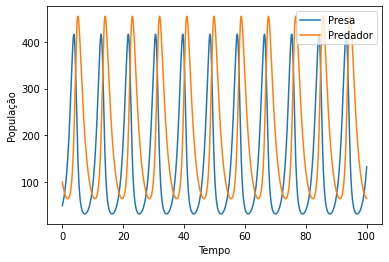

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
b = 1             
h = 0.005        
epsilon = 0.8     
d = 0.6          


x = 50           
y = 100          
t = 0
delta_t = 0.001
max_t = 100

t_list = [0]
x_list = [x]
y_list = [y]

while t < max_t:
    
    t = t + delta_t
    x = x + dxdt(x,y,b,h,epsilon,d) * delta_t
    y = y + dydt(x,y,b,h,epsilon,d) * delta_t

    
    t_list.append(t)   
    x_list.append(x)    
    y_list.append(y)    
plt.plot(t_list,x_list,label="Presa")
plt.plot(t_list,y_list,label="Predador")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.legend(loc='upper right')

Podemos observar os ciclos: mais presas $\rightarrow$ maior quantidade de comida para predatores $\rightarrow$ aumento dos predadores $\rightarrow$ diminuição na comida para os predadores $\rightarrow$ diminuição de predadores $\rightarrow$ aumentando o número de presas, $\cdots$.



### Correlação



Para calcular a correlação envolvendo duas listas (e não um dataframe) vamos usar `np.corrcoef`.

In [ ]:

np.corrcoef(x_list, y_list)[0, 1]

0.007950574839130534

### Exercícios

Refaça a simulação com os parâmetros acima,  alterando o valor de `h` para 0.01 e 0.02

In [ ]:
# sua solução aqui

# Extra 

O material a seguir continua detalhando a simulação de presa-predador de forma mais avançada.

## Gráfico de órbitas

Uma outra maneira de visualizar a dinâmica é o grafico de presas $\times$ predadores, conhecido como gráfico de órbitas no espaço de fases:

Text(0, 0.5, 'Predador')

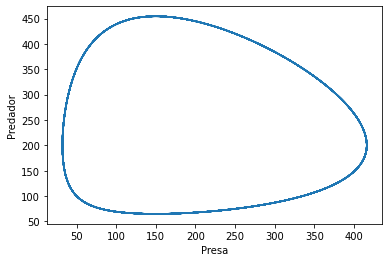

In [ ]:
plt.plot(x_list, y_list)
plt.xlabel('Presa')
plt.ylabel('Predador')


## Função Predado_Presa

Vamos criar uma função com os passos acima para realizar a simulação, e retornar as listas de tempo, predador e presa.  Isto facilita reusar este código conforme veremos mais adiante.

In [ ]:
def predador_presa(x,y,b,h,epsilon,d,delta_t,max_t):

  # tempo de simulação
  t = 0

  # armazena os valores iniciais em listas
  t_list = [0]
  x_list = [x]
  y_list = [y]

  while t < max_t:
      # calcula  novos valores de  t, x, y
      t = t + delta_t
      x = x + dxdt(x,y,b,h,epsilon,d) * delta_t
      y = y + dydt(x,y,b,h,epsilon,d) * delta_t

      # armazena os valoes em listas
      t_list.append(t)
      x_list.append(x)
      y_list.append(y)
  
  return(t_list,x_list,y_list)

## Equilíbrio

Equilíbro, isto é, estados estáveis, são um importante conceito em modelos dinâmicos

Equilíbrio populacional ocorre no modelo quando nenhuma das populações muda. 

Matematicamente falando, isso ocorre quando ambos $\frac{dx}{dt}=0$ e $\frac{dy}{dt}=0$:

$$ bx - hxy = 0 \\ \epsilon h x y - d y = 0 \Rightarrow \\ x (b - hy) = 0 \\ y (\epsilon h x - d) = 0 $$

Uma solução trivial é quando $x=0$ and/or $y=0$. Assumindo que ambas são positivas: 
$$ x^* = \frac{d}{\epsilon h} \\ y^* = \frac{b}{h} $$

Vamos cacular a população de equilíbrio, e ralizar uma simulação com essa população como população inicial:


População de equilibrio - Presa:  150.0
População de equilibrio - Predador:  200.0


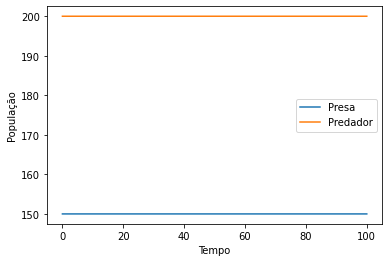

In [ ]:
b = 1             # taxa de natalidade da presa
h = 0.005         # taxa de predação quando o predador encontra a presa
epsilon = 0.8     # taxa em que a densidade da presa é convertida em predator quando a predação ocorre.
d = 0.6           # taxa de mortalidade do predador
#--------------------------------------------------------------------
x_estrela = d/(epsilon*h) 
print("População de equilibrio - Presa: ",x_estrela)
y_estrela = b/h
print("População de equilibrio - Predador: ",y_estrela)
#----------------------------------------------------------------------
# note que x_estrela é x e y_estrela é y
t_list, x_list, y_list = predador_presa(x_estrela, y_estrela, b, h, epsilon, d, delta_t, max_t)

plt.plot(t_list,x_list,label="Presa")
plt.plot(t_list,y_list,label="Predador")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.legend()

## Estabilidade

Um outro conceito frequentemente analisado é o de estababilidade. Basicamente, procuramos averiguar se pequenas pertubações em estado de equilíbrio, será que o sistema volta ao seu equilíbrio?

Para analisar a estabilidade, vamos usar um outro método para resolver as equações diferencias. Esse método usa funções da biblioteca `scipy` que automaticamente ajusta $\Delta t$ e o número de passos de maneira a melhor aproximar a solução. Não se preocupe com os detalhes, considere como um método alternativo que resolve o `predador_presa` com um método mais preciso. A razão para usarmos esse outro método é que o anterior, que usa aproximação linear discreta, não é preciso o suficiente para pequenas variações.  


In [ ]:
from functools import partial
from scipy.integrate import solve_bvp, solve_ivp, odeint

def predador_presa_solver(x0, y0, b, h, epsilon, d, tmax):

    def dxydt(t, xy, b, h, epsilon, d):
        x, y = xy
        dx = b * x - h * x * y
        dy = epsilon * h * x * y - d * y
        return np.array([dx, dy])

    def jac(t, xy, b, h, epsilon, d):
        x, y = xy
        return np.array([
            [b - h * y, -h * x],
            [epsilon * h * y, epsilon * h * x - d]
        ])

    t = np.linspace(0, tmax, tmax*10)
    xy0 = (x0, y0)
    dxydt_ = partial(dxydt, b=b, h=h, epsilon=epsilon, d=d)
    jac_ = partial(jac, b=b, h=h, epsilon=epsilon, d=d)
    sol = solve_ivp(dxydt_, (t.min(), t.max()), xy0, t_eval=t, method='BDF', jac=jac_)
    return(sol.t, sol.y[0], sol.y[1])

Vamos agora causar uma pequena perturbação de 1% em $x^*$ e $y^*$, e fazer uma simulação com `predador_presa_solver`:

In [ ]:
x_perturbado = x_estrela*1.01
print("População de equilibrio perturbada - Presa: ",round(x_perturbado))
y_perturbado = y_estrela*1.01
print("População de equilibrio perturbada - Presa: ",round(y_perturbado))


t_list, x_list, y_list = predador_presa_solver(x_perturbado, y_perturbado, b, h, epsilon, d,  max_t)

População de equilibrio perturbada - Presa:  152
População de equilibrio perturbada - Presa:  202


O gráfico a seguir mostra que essa pequena perturbação altera o estado de equilíbrio:

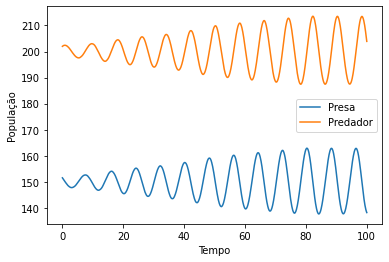

In [ ]:
plt.plot(t_list,x_list,label="Presa")
plt.plot(t_list,y_list,label="Predador")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.legend()

Analisando o gráfico de órbitas, vemos que a órbita cresce a partir da população inicial



(136.38632054974738, 164.1329561340963, 186.14941374826614, 214.85707547293234)

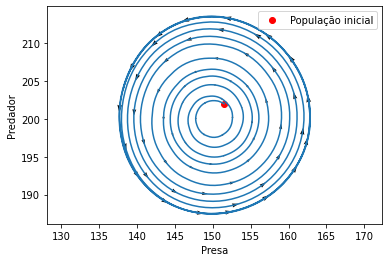

In [ ]:
# população inicial
plt.plot(x_perturbado,y_perturbado,'ro',label="População inicial")

# órbitas
plt.plot(x_list,y_list)

# adiciona setas para mostrar o sentido do crescimento
plt.quiver(x_list[:-1:15],y_list[:-1:15], x_list[1::15] - x_list[:-1:15],
                          y_list[1::15] - y_list[:-1:15],
           scale_units='xy', angles='xy', scale=1, width=0.005)
plt.xlabel("Presa")
plt.ylabel("Predador")
plt.legend()
plt.axis('equal')

Vamos aumentar o tempo de simulação para para ver o que acontece:

In [ ]:
x_perturbado = x_estrela*1.01
print("População de equilibrio perturbada - Presa: ",round(x_perturbado))
y_perturbado = y_estrela*1.01
print("População de equilibrio perturbada - Presa: ",round(y_perturbado))



t_list, x_list, y_list = predador_presa_solver(x_perturbado, y_perturbado, b, h, epsilon, d,  2000)

População de equilibrio perturbada - Presa:  152
População de equilibrio perturbada - Presa:  202


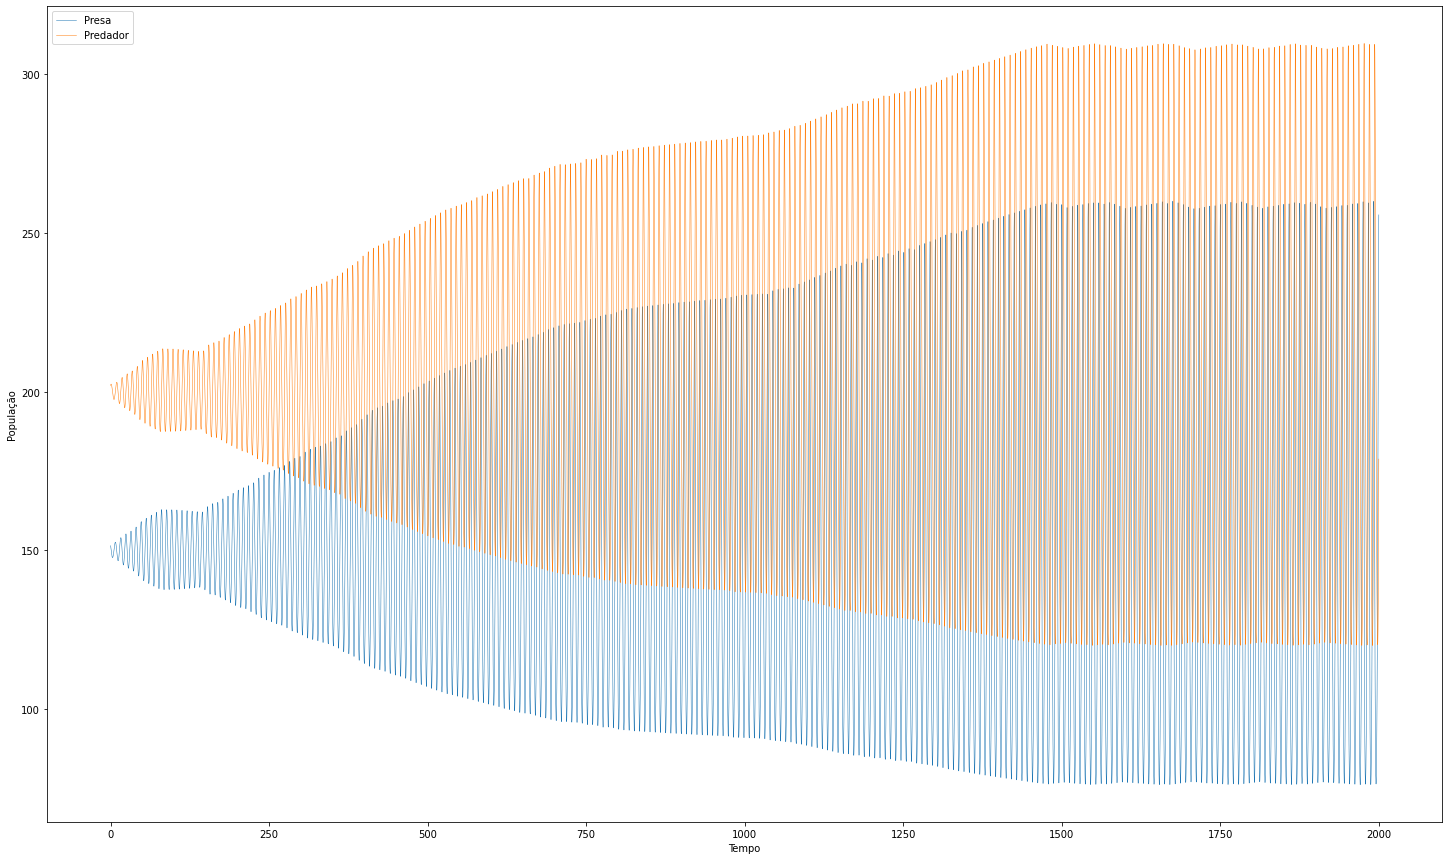

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(t_list,x_list,label="Presa",lw=0.5)
plt.plot(t_list,y_list,label="Predador",lw=0.5)
plt.xlabel("Tempo")
plt.ylabel("População")
plt.legend()

(66.99395183475086, 269.2294185760584, 110.55606983745142, 319.22304732685416)

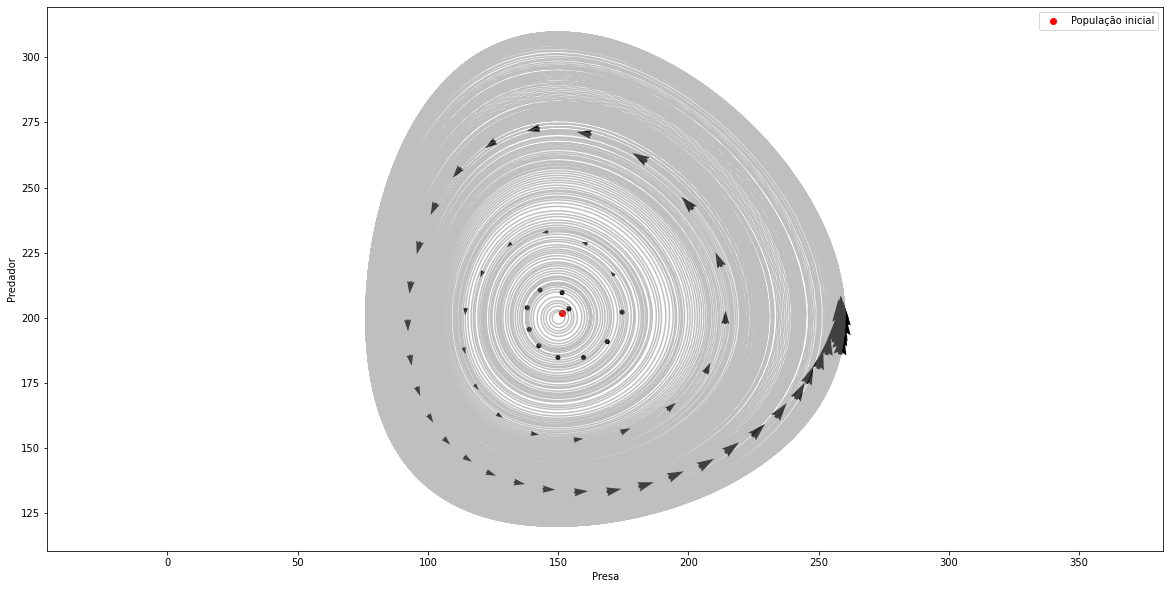

In [ ]:
plt.figure(figsize=(20,10))

# população inicial
plt.plot(x_perturbado,y_perturbado,'ro',label="População inicial",lw=0.5)

# órbitas
plt.plot(x_list,y_list,color='gray',alpha=0.5)

# adiciona setas para mostrar o sentido do crescimento
plt.quiver(x_list[:-1:250],y_list[:-1:250], x_list[1::250] - x_list[:-1:250],
                          y_list[1::250] - y_list[:-1:250],
           scale_units='xy', angles='xy', scale=1, width=0.005)
plt.xlabel("Presa")
plt.ylabel("Predador")
plt.legend()
plt.axis('equal')

## Exercícios

1. Repita os experimentos com uma perturbação de 0,5% e 1,5%. 

1. Calcule a população de equilíbrio para $h=0.001$ e $h=0.01$, e repita os experimentos com perturbação de 1%.